<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reconocimiento-de-prendas-(Fashion-MNIST-dataset)-con-keras/tensorflow" data-toc-modified-id="Reconocimiento-de-prendas-(Fashion-MNIST-dataset)-con-keras/tensorflow-1">Reconocimiento de prendas (Fashion MNIST <em>dataset</em>) con keras/tensorflow</a></span><ul class="toc-item"><li><span><a href="#dataset:-Fashion-MNIST-dataset" data-toc-modified-id="dataset:-Fashion-MNIST-dataset-1.1"><em>dataset</em>: Fashion-MNIST <em>dataset</em></a></span></li><li><span><a href="#0.-Importación-de-librerías" data-toc-modified-id="0.-Importación-de-librerías-1.2">0. Importación de librerías</a></span></li><li><span><a href="#1.-Precarga-del-dataset-(keras)" data-toc-modified-id="1.-Precarga-del-dataset-(keras)-1.3">1. Precarga del <em>dataset</em> (keras)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#--datasets-info:" data-toc-modified-id="--datasets-info:-1.3.0.1">- <em>datasets info</em>:</a></span></li><li><span><a href="#--sample:" data-toc-modified-id="--sample:-1.3.0.2">- <em>sample</em>:</a></span></li></ul></li></ul></li><li><span><a href="#2.-Preprocesado-del-dataset" data-toc-modified-id="2.-Preprocesado-del-dataset-1.4">2. Preprocesado del <em>dataset</em></a></span><ul class="toc-item"><li><span><a href="#2.1.-Normalización-de-las-imágenes" data-toc-modified-id="2.1.-Normalización-de-las-imágenes-1.4.1">2.1. Normalización de las imágenes</a></span></li><li><span><a href="#2.2.-Condificación-one-hot-de-las-etiquetas" data-toc-modified-id="2.2.-Condificación-one-hot-de-las-etiquetas-1.4.2">2.2. Condificación <em>one-hot</em> de las etiquetas</a></span></li></ul></li><li><span><a href="#3.-Creación-del-modelo" data-toc-modified-id="3.-Creación-del-modelo-1.5">3. Creación del modelo</a></span></li><li><span><a href="#4.-Compilación-del-modelo" data-toc-modified-id="4.-Compilación-del-modelo-1.6">4. Compilación del modelo</a></span></li><li><span><a href="#5.-Entrenamiento-del-modelo" data-toc-modified-id="5.-Entrenamiento-del-modelo-1.7">5. Entrenamiento del modelo</a></span></li><li><span><a href="#6.-Evaluación-del-modelo" data-toc-modified-id="6.-Evaluación-del-modelo-1.8">6. Evaluación del modelo</a></span><ul class="toc-item"><li><span><a href="#6.1.-Confusion-matrix" data-toc-modified-id="6.1.-Confusion-matrix-1.8.1">6.1. Confusion matrix</a></span></li></ul></li><li><span><a href="#7.-Haciendo-predicciones" data-toc-modified-id="7.-Haciendo-predicciones-1.9">7. Haciendo predicciones</a></span></li><li><span><a href="#6.-Evaluación-del-modelo" data-toc-modified-id="6.-Evaluación-del-modelo-1.10">6. Evaluación del modelo</a></span></li></ul></li></ul></div>

## Reconocimiento de prendas (Fashion MNIST _dataset_) con keras/tensorflow

### _dataset_: Fashion-MNIST _dataset_
---

Es una colección de imágenes de prendas de vestir proporcionada por [Zalando Research](https://corporate.zalando.com/en/company/research-zalando) usada para el entrenamiento y testeo de sistemas y algoritmos de procesado de imágenes, especialmente en el campo de aprendizaje automático.

<br>Al igual que su laureado y reconocido predecesor (MNIST), **[Fashion-MNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist)** se compone de imágenes en **escala de grises**, de **28×28** pixeles. En concreto, este _dataset_ está compuesto por **70.000**, repartidas en **10 categorías**, donde **60.000** de ellas son para entrenamiento y las restantes **10.000** para pruebas. Todas las categorías (10) poseen el mismo número de imágenes (7.000), lo que implica que el dataset está **balanceado**.

<br>Las 10 categorías son:

- 0: T-shirt/top (Camiseta o top)

- 1: Trouser/pants (Pantalones)

- 2: Pullover shirt (Pullover)

- 3: Dress (Vestido)

- 4: Coat (Abrigo)

- 5: Sandal (Sandalias)

- 6: Shirt (Camisa)

- 7: Sneaker (Zapatos deportivos)

- 8: Bag (Bolso o maleta)

- 9: Ankle boot (Botines)

<br>En la imagen inferior se observan muestras para cada una de las categorías (cada prenda se halla representada por 3 filas de la foto):

<br><img src="https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png"/>

### 0. Importación de librerías
---

In [68]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

# version de tensorflow
print(f"tensorflow version: {tf.__version__}")

# soporte GPU
gpu_list = tf.config.list_physical_devices('GPU')
print(f"tensorflow GPU support: {'yes' if len(gpu_list) else 'no'}")
for i,gpu in enumerate(gpu_list):
    print(f"\t[{i}] - name: {gpu[0]}")

tensorflow version: 2.7.0
tensorflow GPU support: yes
	[0] - name: /physical_device:GPU:0


### 1. Precarga del _dataset_ (keras)
---

In [69]:
# creación de los dataset de entrenamiento y test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# lista de categorías
categories = ["t-shirt/top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"]

##### - _datasets info_:

In [70]:
# datasets info
print(f"x_train: {x_train.dtype} {x_train.shape}")
print(f"y_train: {y_train.dtype} {y_train.shape}")
print(f"x_test: {x_test.dtype} {x_test.shape}")
print(f"y_test: {y_test.dtype} {y_test.shape}")

x_train: uint8 (60000, 28, 28)
y_train: uint8 (60000,)
x_test: uint8 (10000, 28, 28)
y_test: uint8 (10000,)


##### - _sample_:

In [71]:
def show_image(data, label, labels=None):
    """Muestra la imagen seleccionada del training dataset."""
    # label
    print(f"Label: {label} {'(' + labels[label] + ')' if labels else ''}")

    # image
    print("\nImage:", end="")
    plt.figure(figsize=(2,2))
    plt.imshow(data, cmap=plt.cm.binary)
    plt.show()
    
    # data matrix
    print("\nData:")
    for i in range(len(data)):
        for j in range(len(data[0])):
            print(f"{data[i,j]:^5d}", end=" ")
        print()

Label: 9 (ankle boot)

Image:

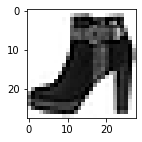


Data:
  0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0   
  0     0     0     0     0     0     0     0     0     0     0    37    95    97    120   140   48     0     0     0    20    49    71    89    79     0     0     0   
  0     0     0     0     0     0     0     0     0     8     0    149   254   235   255   255   255   191   209   201   255   255   229   255   226    0     0     0   
  0     0     0     0     0     0     0     0     0     3     0    130   239   219   223   215   255   249   226   168   255   152   91    254   202    0     0     0   
  0     0     0     0     0     0     0     0     0     0     0    171   245   233   245   250   187   144   199   193   213   223   206   183   239   42     0     0   
  0     0     0     0     0     0     0     0     0     0     0    162   185   171   194   176   150   167   166   160   165   192   139   58    186

In [72]:
i = random.randint(0, len(x_train)-1)
show_image(x_train[i], y_train[i], categories)

### 2. Preprocesado del _dataset_
---

#### 2.1. Normalización de las imágenes
---

In [73]:
# Normalización de los valores de los píxels de las imágenes al rango [0,1]
xn_train = x_train.astype('float32')/255
xn_test = x_test.astype('float32')/255

print(f"xn_train: {xn_train.dtype} {xn_train.shape}")
print(f"xn_test: {xn_test.dtype} {xn_test.shape}")

xn_train: float32 (60000, 28, 28)
xn_test: float32 (10000, 28, 28)


#### 2.2. Condificación _one-hot_ de las etiquetas
---

In [74]:
from tensorflow.keras.utils import to_categorical

# one-hot encodind a 10-clases
yn_train = to_categorical(y_train, num_classes=10)
yn_test = to_categorical(y_test, num_classes=10)

print(f"yn_train: {yn_train.dtype} {yn_train.shape}")
print(f"yn_test: {yn_test.dtype} {yn_test.shape}")

yn_train: float32 (60000, 10)
yn_test: float32 (10000, 10)


In [75]:
#sample
i = random.randint(0, len(y_train)-1)
print(f"label: {y_train[i]} --> one-hot: {yn_train[i]}")

label: 8 --> one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


### 3. Creación del modelo
---

In [76]:
# model definition
model = tf.keras.Sequential(name="mnist_fashion_model")
# añadimos una capa para convertir la entrada a un vector-1D (flatten)
model.add(tf.keras.layers.Flatten(input_shape=(28,28), name="input"))
model.add(tf.keras.layers.Dense(10, activation="relu", name="hidden"))
model.add(tf.keras.layers.Dense(10, activation="softmax", name="ouput"))

# model description
model.summary()

Model: "mnist_fashion_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 10)                7850      
                                                                 
 ouput (Dense)               (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


### 4. Compilación del modelo
---

In [77]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

### 5. Entrenamiento del modelo
---

In [78]:
model.fit(xn_train, yn_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7194 - accuracy: 0.7505
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4716 - accuracy: 0.8368
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4382 - accuracy: 0.8487
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4202 - accuracy: 0.8548
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4075 - accuracy: 0.8587
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3978 - accuracy: 0.8619
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3906 - accuracy: 0.8645
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3855 - accuracy: 0.8659
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3813 - accuracy: 0.8663
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.376

### 6. Evaluación del modelo
---

In [79]:
loss, acc = model.evaluate(xn_test, yn_test)

print(f"Precision: {acc*100.0:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.4267 - accuracy: 0.8504
Precision: 85.04%


#### 6.1. Confusion matrix
---

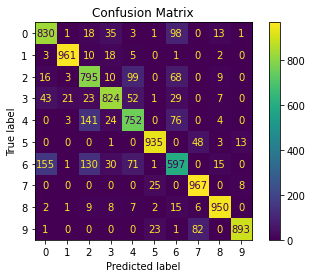

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(xn_test)
cm = confusion_matrix(y_test, predictions.argmax(axis=1))
img = ConfusionMatrixDisplay(confusion_matrix=cm)
img.plot()
plt.title("Confusion Matrix")
plt.show()

### 7. Haciendo predicciones
---

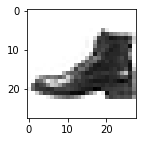

In [81]:
i = random.randint(0, len(xn_test))

plt.figure(figsize = (2,2))
plt.imshow(xn_test[i], cmap=plt.cm.binary)
plt.show()

In [82]:
probs = model.predict(np.array([xn_test[i]]))
predicted_label = np.argmax(probs)
actual_label = y_test[i]
print(f"Predicted Label: {predicted_label} ({categories[predicted_label]})")
print(f"Actual Label: {actual_label} ({categories[actual_label]})")
print(f"Confidence:")
for i, p in enumerate(probs[0]):
    print(f"\t{i} ({categories[i]:11}): {p*100:.2f}%")

Predicted Label: 9 (ankle boot)
Actual Label: 9 (ankle boot)
Confidence:
	0 (t-shirt/top): 0.00%
	1 (trouser    ): 0.00%
	2 (pullover   ): 0.00%
	3 (dress      ): 0.00%
	4 (coat       ): 0.00%
	5 (sandal     ): 0.13%
	6 (shirt      ): 0.00%
	7 (sneaker    ): 0.22%
	8 (bag        ): 0.00%
	9 (ankle boot ): 99.65%
